In [1]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

tf.random.set_seed(0)

2023-03-06 10:22:03.104372: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 10:22:03.532039: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-06 10:22:03.532100: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-06 10:22:04.854440: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
higgs_data = pd.read_csv('../higgs.csv', dtype=float)
higgs_data

,label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,0.0,0.915045,-0.318542,0.623526,0.431166,1.338325,0.641709,-0.750620,1.153816,2.173076,...,-0.691704,-0.797121,0.000000,0.662336,0.888811,0.994402,0.876122,1.207429,0.790956,0.733438
12996,0.0,1.076093,0.377846,0.301706,0.297954,-1.517734,0.715086,1.019911,-1.453517,2.173076,...,-0.261967,0.204601,3.101961,1.031421,0.828652,0.986768,0.845410,1.701100,1.004952,0.854111
12997,1.0,1.296986,-1.198036,0.437647,1.742790,-0.218009,2.283859,-0.934802,1.201492,0.000000,...,-0.142873,1.619627,0.000000,1.124735,2.031752,1.159143,0.975911,1.069575,1.566676,1.410350
12998,1.0,1.151859,-0.981815,-1.661498,0.741689,0.353002,0.667175,0.204952,0.488566,2.173076,...,-0.825788,-0.094044,1.550981,0.973411,0.997322,1.242204,0.739249,0.681640,0.757485,0.812424


In [3]:
X_train, X_test, y_train, y_test = train_test_split(higgs_data.iloc[:,1:], higgs_data.iloc[:,0], train_size=11000 )

In [4]:
normalizer = layers.Normalization()
normalizer.adapt(np.array(X_train))

2023-03-06 10:27:47.236266: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-06 10:27:47.236545: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-06 10:27:47.236580: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (thomas-Lenovo-V15-G2-ALC): /proc/driver/nvidia/version does not exist
2023-03-06 10:27:47.237873: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
NUM_EPOCHS = 10000
BATCH_SIZE = 100
STEPS_PER_EPOCH = X_train.shape[0] // BATCH_SIZE

In [8]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps=STEPS_PER_EPOCH * 100,
    decay_rate=1,
    staircase=False
)

Text(0, 0.5, 'Learning Rate')

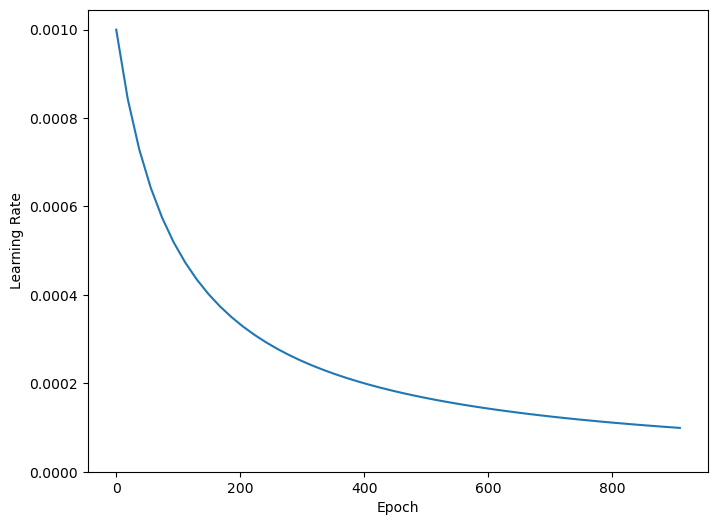

In [9]:
step = np.linspace(0, 100000)
lr = lr_schedule(step)
plt.figure(figsize=(8, 6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')


In [12]:
model = keras.Sequential([
    normalizer,
    layers.Dense(300, activation='elu'),
    layers.Dense(300, activation='elu'),
    layers.Dense(300, activation='elu'),
    layers.Dense(300, activation='elu'),
    layers.Dense(300, activation='elu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(lr_schedule),
              metrics=[
                tf.keras.losses.BinaryCrossentropy(from_logits=False, name='binary_crossentropy'), tf.metrics.BinaryAccuracy(threshold=0.5)
              ])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 28)               57        
 n)                                                              
                                                                 
 dense (Dense)               (None, 300)               8700      
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dense_3 (Dense)             (None, 300)               90300     
                                                                 
 dense_4 (Dense)             (None, 300)               90300     
                                                        

In [14]:
# From https://github.com/tensorflow/docs/blob/master/tools/tensorflow_docs/modeling/__init__.py
class EpochDots(tf.keras.callbacks.Callback):
    """A simple callback that prints a "." every epoch, with occasional reports.
    
    Args:
        report_every: How many epochs between full reports
        dot_every: How many epochs between dots.
    """

    def __init__(self, report_every=100, dot_every=1):
        self.report_every = report_every
        self.dot_every = dot_every

    def on_epoch_end(self, epoch, logs):
        if epoch % self.report_every == 0:
            print()
            print('Epoch: {:d}, '.format(epoch), end='')
            for name, value in sorted(logs.items()):
                print('{}:{:0.4f}'.format(name, value), end=',  ')
            print()

        if epoch % self.dot_every == 0:
            print('.', end='', flush=True)

In [15]:
early_stop = [
    EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),]

history = model.fit(
    X_train, y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1, verbose=0, callbacks=early_stop
)


Epoch: 0, binary_accuracy:0.6051,  binary_crossentropy:0.6604,  loss:0.6604,  val_binary_accuracy:0.6382,  val_binary_crossentropy:0.6424,  val_loss:0.6424,  
....................................................................................................
Epoch: 100, binary_accuracy:1.0000,  binary_crossentropy:0.0000,  loss:0.0000,  val_binary_accuracy:0.6727,  val_binary_crossentropy:3.1752,  val_loss:3.1752,  
....................................................................................................
Epoch: 200, binary_accuracy:1.0000,  binary_crossentropy:0.0000,  loss:0.0000,  val_binary_accuracy:0.6700,  val_binary_crossentropy:4.5845,  val_loss:4.5845,  
.............

In [17]:
def plot_loss(history):
    plt.plot(history.history['binary_crossentropy'], label='training')
    plt.plot(history.history['val_binary_crossentropy'], label='validation')
    plt.xlabel('Epoch')
    plt.ylabel('Binary Crossentropy')
    plt.legend()
    plt.grid(True)

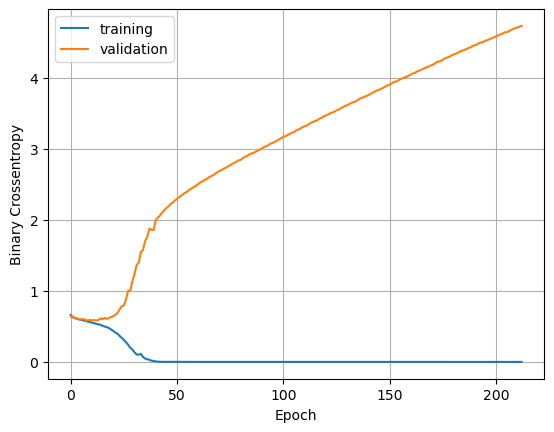

In [18]:
plot_loss(history)

In [19]:
model = keras.Sequential([
    normalizer,
    layers.Dense(300, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(300, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(300, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(300, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(300, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(lr_schedule),
              metrics=[
                tf.keras.losses.BinaryCrossentropy(from_logits=False, name='binary_crossentropy'), tf.metrics.BinaryAccuracy(threshold=0.5)
              ])

In [20]:
history = model.fit(
    X_train, y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1, verbose=0, callbacks=early_stop
)


Epoch: 0, binary_accuracy:0.5393,  binary_crossentropy:0.7916,  loss:0.7916,  val_binary_accuracy:0.5982,  val_binary_crossentropy:0.6489,  val_loss:0.6489,  
....................................................................................................
Epoch: 100, binary_accuracy:0.7052,  binary_crossentropy:0.5576,  loss:0.5576,  val_binary_accuracy:0.6982,  val_binary_crossentropy:0.5638,  val_loss:0.5638,  
....................................................................................................
Epoch: 200, binary_accuracy:0.7309,  binary_crossentropy:0.5245,  loss:0.5245,  val_binary_accuracy:0.6927,  val_binary_crossentropy:0.5678,  val_loss:0.5678,  
..................................................................................................

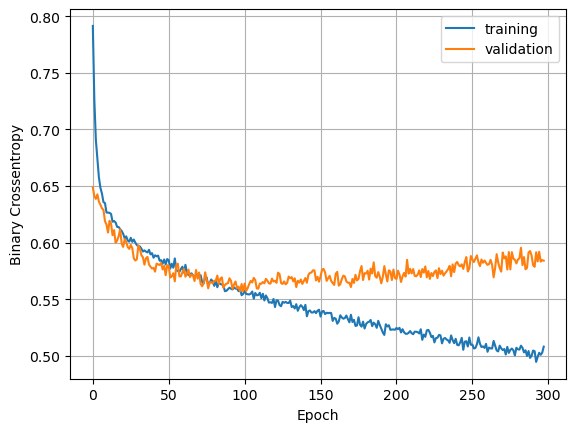

In [21]:
plot_loss(history)

In [22]:
model = keras.Sequential([
    normalizer,
    layers.Dense(300, input_shape=(X_train.shape[1],),
                 kernel_regularizer=regularizers.l2(0.001),
                 activation='elu'),
    layers.Dense(300,
                 kernel_regularizer=regularizers.l2(0.001),
                 activation='elu'),
    layers.Dense(300,
                 kernel_regularizer=regularizers.l2(0.001),
                 activation='elu'),
    layers.Dense(300,
                 kernel_regularizer=regularizers.l2(0.001),
                 activation='elu'),
    layers.Dense(300,
                 kernel_regularizer=regularizers.l2(0.001),
                 activation='elu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(lr_schedule),
              metrics=[
                  tf.keras.losses.BinaryCrossentropy(from_logits=False, name='binary_crossentropy'),
                  tf.metrics.BinaryAccuracy(threshold=0.5)
              ])

In [23]:
history = model.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1,verbose=0, callbacks=early_stop)


Epoch: 0, binary_accuracy:0.6049,  binary_crossentropy:0.6644,  loss:1.6124,  val_binary_accuracy:0.6291,  val_binary_crossentropy:0.6342,  val_loss:1.3206,  
....................................................................................................
Epoch: 100, binary_accuracy:0.7158,  binary_crossentropy:0.5520,  loss:0.5785,  val_binary_accuracy:0.6891,  val_binary_crossentropy:0.5831,  val_loss:0.6097,  
....................................................................................................
Epoch: 200, binary_accuracy:0.7382,  binary_crossentropy:0.5257,  loss:0.5546,  val_binary_accuracy:0.6945,  val_binary_crossentropy:0.5999,  val_loss:0.6289,  
................................................................................................

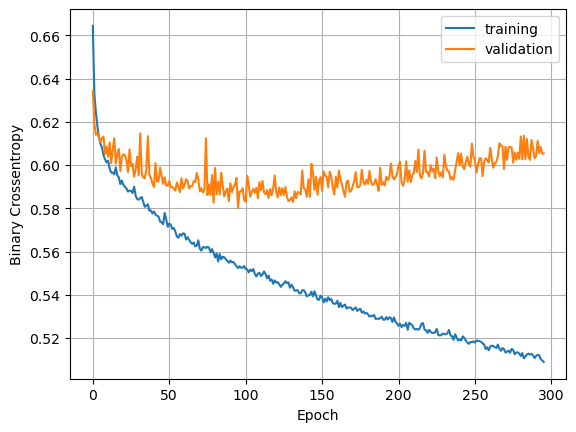

In [24]:
plot_loss(history)

In [25]:
model = keras.Sequential([
    normalizer,
    layers.Dense(300, input_shape=(X_train.shape[1],),
                 kernel_regularizer=regularizers.l2(0.001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(300,
                 kernel_regularizer=regularizers.l2(0.001),
                 activation='elu'),
    layers.Dropout(0.5),    
    layers.Dense(300,
                 kernel_regularizer=regularizers.l2(0.001),
                 activation='elu'),
    layers.Dropout(0.5),    
    layers.Dense(300,
                 kernel_regularizer=regularizers.l2(0.001),
                 activation='elu'),
    layers.Dropout(0.5),    
    layers.Dense(300,
                 kernel_regularizer=regularizers.l2(0.001),
                 activation='elu'),
    layers.Dropout(0.5),    
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(lr_schedule),
              metrics=[
                  tf.keras.losses.BinaryCrossentropy(from_logits=False, name='binary_crossentropy'),
                  tf.metrics.BinaryAccuracy(threshold=0.5)
              ])

In [26]:
history = model.fit(X_train, y_train,epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1, verbose=0, callbacks=early_stop)


Epoch: 0, binary_accuracy:0.5252,  binary_crossentropy:0.8067,  loss:1.9949,  val_binary_accuracy:0.6045,  val_binary_crossentropy:0.6528,  val_loss:1.7707,  
....................................................................................................
Epoch: 100, binary_accuracy:0.6665,  binary_crossentropy:0.6136,  loss:0.6431,  val_binary_accuracy:0.6691,  val_binary_crossentropy:0.6071,  val_loss:0.6376,  
....................................................................................................
Epoch: 200, binary_accuracy:0.6700,  binary_crossentropy:0.6094,  loss:0.6366,  val_binary_accuracy:0.6691,  val_binary_crossentropy:0.6072,  val_loss:0.6347,  
....................................................................................................
Epoch: 300, binary_accuracy:0.6732,  binary_crossentropy:0.6108,  loss:0.6365,  val_binary_accuracy:0.6682,  val_binary_crossentropy:0.6060,  val_loss:0.6316,  
......................................................

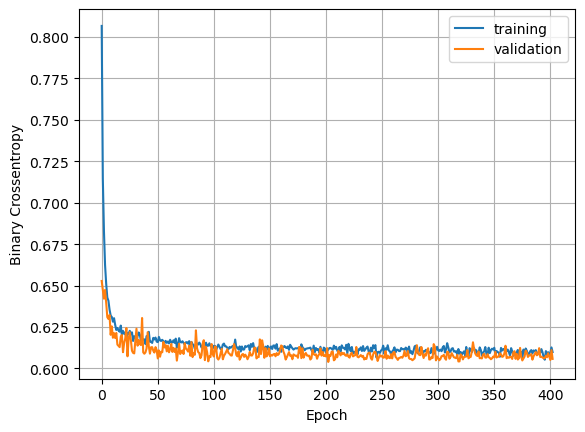

In [27]:
plot_loss(history)

In [29]:
metrics = model.evaluate(X_test, y_test, verbose=0)
for metric_name, metric in zip(model.metrics_names, metrics):
    print(metric_name, metric)

loss 0.6218814849853516
binary_crossentropy 0.5975253582000732
binary_accuracy 0.6804999709129333
